# 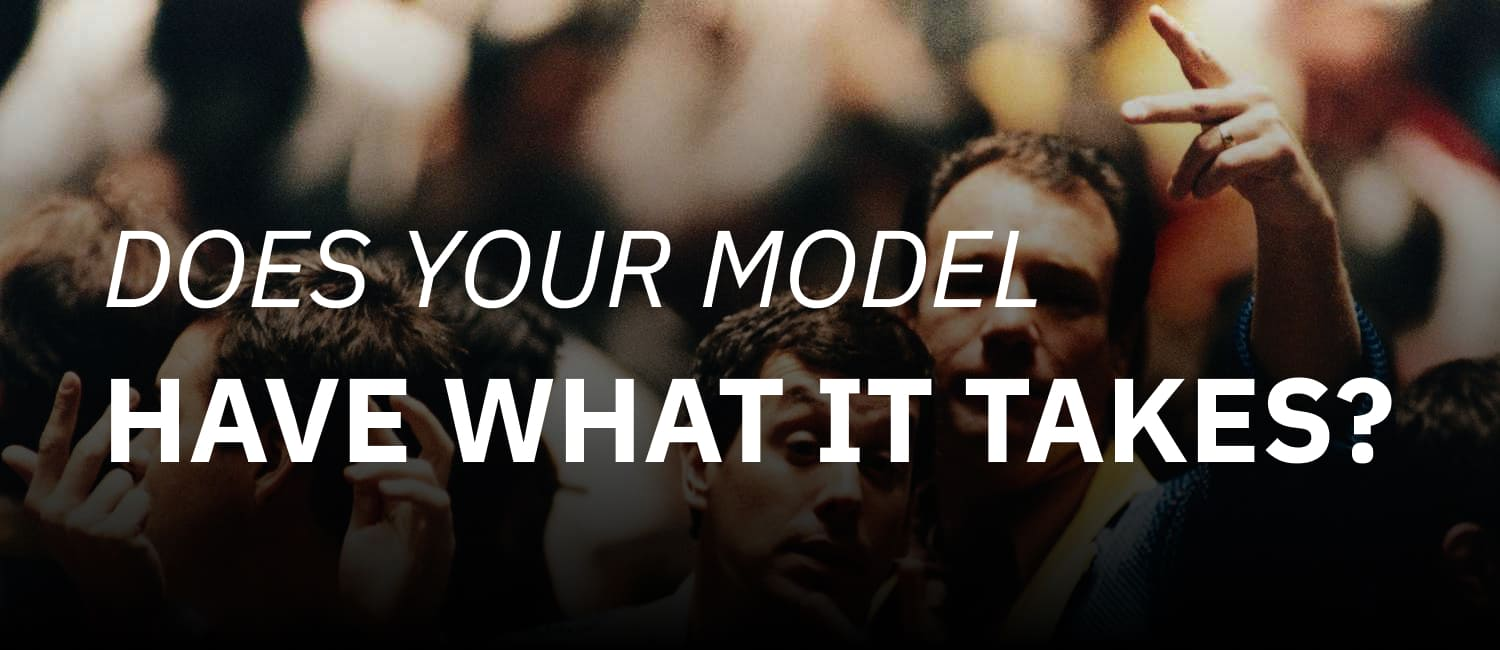

# Environment setup

Get your environment setup command on the following link: https://hub.crunchdao.com/competitions/datacrunch/submit

Read the doc: https://docs.crunchdao.com/competitions/competitions/datacrunch-competition

In [12]:
%pip install crunch-cli --upgrade
!crunch setup datacrunch equity-ranker-1 . --token 7SGLFKcfPj3dBfO4Eo9bnEfsnIveQnEYHUwQD2Fr7s7Tsg91SRdqCRZexyCkmDri --force


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

---
Your token seems to have expired or is invalid.

Please follow this link to copy and paste your new setup command:
http://hub.crunchdao.io/competitions/datacrunch/submit

If you think that is an error, please contact an administrator.


# Import

**IMPORTANT**: For each library import, in order to avoid any issue related to the library version, it is strongly recommended to specify the version of the library you are using. This to ensure that the notebook will be reproducible in the Crunch Foundation environment without any undesirable modification to the behavior of your code.

If you submit through the cli, fill the `requirements.txt` with the libraries used and their respective versions.

In [3]:
# Install the necessary packages
#%pip install [package_name]

In [4]:
# Imports
import os

# Specify the library version with the `==` operator. Follow the examples below for any other library added.
# You can get the version of the library you are using by running the command `!pip show <library_name>`, or '!pip freeze | grep <library_name>'.
# If you submit a .py file, you can add the library version to the requirements.txt file.
import joblib # == 1.3.2
import pandas as pd # == 2.1.0
import numpy as np # == 1.24.3
# Import sklearn linear model
from sklearn.linear_model import LinearRegression # == 1.1.3
import crunch

# Get the data

In [5]:
# Getting the data
crunch = crunch.load_notebook()
X_train, y_train, X_test = crunch.load_data()

loaded inline runner with module: <module '__main__'>
download data/X_train.parquet from https://crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/48/X_train.parquet (255780694 bytes)
already exists: file length match
download data/y_train.parquet from https://crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/48/y_train.parquet (2376978 bytes)
already exists: file length match
download data/X_test.parquet from https://crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/48/X_test_reduced.parquet (9003134 bytes)
already exists: file length match
download data/y_test.parquet from https://crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/48/y_test_reduced.parquet (78681 bytes)
already exists: file length match
download data/example_prediction.parquet from https://crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/48/example_prediction_reduced.parquet (332138 bytes)
already exists

In [6]:
display(X_train)
display(y_train)
display(X_test)

,id,moon,vratios_Feature_6,vratios_Feature_1,vratios_Feature_2,vratios_Feature_3,vratios_Feature_4,vratios_Feature_5,vratios_Feature_7,vratios_Feature_8,...,fdriver_Feature_149_v2,fdriver_Feature_150_v2,fdriver_Feature_151_v2,fdriver_Feature_152_v2,fdriver_Feature_153_v2,fdriver_Feature_154_v2,fdriver_Feature_155_v2,fdriver_Feature_156_v2,fdriver_Feature_157_v2,fdriver_Feature_158_v2
0,0,0,0.50,0.67,0.50,0.67,0.33,0.67,0.67,0.83,...,0.67,0.33,0.17,0.50,1.00,0.83,0.67,0.83,1.00,0.50
1,512,0,0.00,0.83,0.83,0.17,0.83,0.33,0.83,0.67,...,0.33,0.33,0.50,0.50,0.67,0.67,0.67,0.67,0.83,0.67
2,513,0,0.33,0.67,0.50,0.33,0.67,0.33,0.67,0.33,...,0.50,0.50,0.67,0.83,0.50,0.67,0.83,0.50,0.33,0.67
3,514,0,0.83,0.33,0.33,0.67,0.50,0.33,0.33,0.67,...,0.67,0.50,0.67,0.67,0.83,0.83,0.67,0.17,0.17,0.17
4,515,0,0.83,0.33,0.00,0.83,0.00,1.00,0.50,0.17,...,0.67,0.50,0.67,0.67,0.33,0.67,0.83,0.67,0.83,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378991,378377,422,0.50,1.00,1.00,1.00,0.17,0.83,0.33,0.50,...,0.67,0.67,0.67,0.67,0.67,0.67,0.67,0.67,0.67,0.67
378992,378378,422,0.50,0.83,0.67,0.33,0.83,0.50,0.67,0.33,...,0.50,0.50,0.50,0.67,0.67,0.67,0.67,0.50,0.17,0.50
378993,378379,422,0.67,0.17,0.83,0.67,0.83,0.67,0.67,1.00,...,0.67,0.67,0.67,0.17,0.50,0.33,0.17,0.67,0.83,0.83
378994,378380,422,0.83,0.50,0.50,0.50,0.50,0.67,0.50,0.33,...,0.50,0.50,0.50,0.33,0.33,0.33,0.33,0.50,0.17,0.33


,id,moon,target_w,target_r,target_g,target_b
0,0,0,0.50,0.5,0.50,0.17
1,512,0,0.33,0.5,0.50,0.67
2,513,0,0.50,0.5,0.50,0.50
3,514,0,0.50,0.5,0.50,0.50
4,515,0,0.50,0.5,0.50,0.33
...,...,...,...,...,...,...
378991,378377,422,0.67,0.5,0.50,0.50
378992,378378,422,0.50,0.5,0.50,0.50
378993,378379,422,0.50,0.5,0.50,0.50
378994,378380,422,0.50,0.5,0.33,0.50


,id,moon,vratios_Feature_6,vratios_Feature_1,vratios_Feature_2,vratios_Feature_3,vratios_Feature_4,vratios_Feature_5,vratios_Feature_7,vratios_Feature_8,...,fdriver_Feature_149_v2,fdriver_Feature_150_v2,fdriver_Feature_151_v2,fdriver_Feature_152_v2,fdriver_Feature_153_v2,fdriver_Feature_154_v2,fdriver_Feature_155_v2,fdriver_Feature_156_v2,fdriver_Feature_157_v2,fdriver_Feature_158_v2
0,379615,423,0.83,0.50,1.00,0.83,0.33,1.00,0.33,1.00,...,0.83,0.67,0.67,0.50,0.50,0.50,0.50,0.33,0.33,0.50
1,379614,423,1.00,0.00,0.00,0.83,0.00,1.00,1.00,0.17,...,0.67,0.83,0.83,0.67,0.67,0.67,0.67,0.50,0.67,0.67
2,379613,423,0.67,0.17,0.50,0.67,0.33,0.50,0.33,0.67,...,0.00,0.00,0.00,0.17,0.50,0.50,0.33,0.50,0.83,0.50
3,379612,423,0.50,0.50,0.67,0.50,0.50,0.17,0.17,0.67,...,0.50,0.50,0.50,0.17,0.17,0.17,0.17,0.33,0.33,0.33
4,379606,423,0.17,0.33,0.50,0.83,0.33,0.67,0.83,0.50,...,0.33,0.50,0.67,0.33,0.50,0.50,0.50,0.17,0.17,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11382,389751,434,0.50,0.67,0.33,0.50,0.33,0.17,0.00,0.67,...,0.17,0.17,0.17,0.33,0.33,0.33,0.17,0.50,0.67,0.33
11383,389750,434,0.33,0.50,0.50,0.67,0.67,0.50,0.33,0.50,...,1.00,1.00,1.00,0.67,0.83,0.83,0.67,0.00,0.17,0.33
11384,389749,434,0.50,0.17,0.33,0.67,0.50,0.50,0.67,0.83,...,0.67,0.83,0.83,0.83,0.67,0.67,0.83,0.83,0.67,1.00
11385,389748,434,0.83,0.83,0.67,0.17,0.67,0.83,0.67,0.33,...,0.17,0.17,0.00,0.33,0.17,0.17,0.33,0.50,0.17,0.50


# Train

The train function that will be called by the Crunch platform is defined below.

This function will be called in a frequency that is defined by your `training frequency` parameter that you will define when deploying your model on the Crunch platform.

In [7]:
def get_model_path(
    model_directory_path: str,
    target_column_name: str,
):
    return os.path.join(
        model_directory_path,
        f"model.{target_column_name}.joblib"
    )

In [8]:
# Uncomment what you need!
def train(
    X_train: pd.DataFrame,
    y_train: pd.DataFrame,
    # number_of_features: int,
    model_directory_path: str,
    # id_column_name: str,
    # moon_column_name: str,
    target_column_names: [],
    prediction_column_names: [],
    feature_column_names: [],
    # moon: int,
    # current_moon: int, # same as "moon"
    # embargo: int,
    # has_gpu: bool,
    # has_trained: bool,
) -> None:
    """
    Do your model training here.
    At each retrain this function will have to save an updated version of
    the model under the model_directiory_path, as in the example below.
    Note: You can use other serialization methods than joblib.dump(), as
    long as it matches what reads the model in infer().

    Args:
        X_train, y_train: the data to train the model.
        number_of_features: the number of features of the dataset
        model_directory_path: the path to save your updated model
        id_column_name: the name of the id column
        moon_column_name: the name of the moon column
        target_column_name: the name of the target column
        prediction_column_name: the name of the prediction column
        moon, current_moon: the moon currently being processed
        embargo: data embrago
        has_gpu: if the runner has a gpu
        has_trained: if the moon will train

    Returns:
        None
    """

    for target_column_name, prediction_column_name in zip(target_column_names, prediction_column_names):
        model = LinearRegression()
        
        model.fit(X_train[feature_column_names], y_train[target_column_name])

        model_path = get_model_path(model_directory_path, target_column_name)
        joblib.dump(model, model_path)

# Infer

The `infer` function that will be called by the Crunch platform is defined below.

This function will be called on every `moon` of the `Out-Of-Sample`.

In [9]:
# Uncomment what you need!
def infer(
    X_test: pd.DataFrame,
    # number_of_features: int,
    model_directory_path: str,
    id_column_name: str,
    moon_column_name: str,
    target_column_names: [],
    prediction_column_names: [],
    feature_column_names: [],
    # moon: int,
    # current_moon: int, # same as "moon"
    # embargo: int,
    # has_gpu: bool,
    # has_trained: bool,
) -> pd.DataFrame:
    """
    Do your inference here.
    This function will load the model saved at the previous iteration and use
    it to produce your inference on the current date.
    It is mandatory to send your inferences with the ids so the system
    can match it correctly.

    Args:
        X_test: the independant  variables of the current date passed to your model.
        number_of_features: the number of features of the dataset
        model_directory_path: the path to the directory to the directory in wich we will be saving your updated model.
        id_column_name: the name of the id column
        moon_column_name: the name of the moon column
        target_column_name: the name of the target column
        prediction_column_name: the name of the prediction column
        moon, current_moon: the moon currently being processed
        embargo: data embrago
        has_gpu: if the runner has a gpu
        has_trained: if the moon will train

    Returns:
        A dataframe (date, id, value) with the inferences of your model for the current date.
    """

    # Creating the predicted label dataframe with correct dates and ids
    prediction = X_test[[moon_column_name, id_column_name]].copy()
    
    for target_column_name, prediction_column_name in zip(target_column_names, prediction_column_names):
        # Loading the model saved by the train function at previous iteration
        model_path = get_model_path(model_directory_path, target_column_name)
        model = joblib.load(model_path)

        prediction[prediction_column_name] = model.predict(X_test[feature_column_names])

    return prediction

# Test your model

In [11]:
crunch.test()

20:33:29 no forbidden library found
20:33:29 
20:33:29 started
20:33:29 running local test
20:33:29 internet access isn't restricted, no check will be done
20:33:29 


download data/X_train.parquet from https://crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/48/X_train.parquet (255780694 bytes)
already exists: file length match
download data/y_train.parquet from https://crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/48/y_train.parquet (2376978 bytes)
already exists: file length match
download data/X_test.parquet from https://crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/48/X_test_reduced.parquet (9003134 bytes)
already exists: file length match
download data/y_test.parquet from https://crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/48/y_test_reduced.parquet (78681 bytes)
already exists: file length match
download data/example_prediction.parquet from https://crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/48/example_prediction_reduced.parquet (332138 bytes)
already exists: file length match


20:33:35 starting timeseries loop...
20:33:35 looping moon=423 train=True (1/12)
20:33:35 call: train
20:34:08 call: infer
20:34:08 looping moon=424 train=True (2/12)
20:34:08 call: train
20:34:33 call: infer
20:34:33 looping moon=425 train=True (3/12)
20:34:33 call: train
20:34:58 call: infer
20:34:58 looping moon=426 train=True (4/12)
20:34:58 call: train
20:35:23 call: infer
20:35:23 looping moon=427 train=True (5/12)
20:35:23 call: train
20:35:47 call: infer
20:35:47 looping moon=428 train=True (6/12)
20:35:47 call: train
20:36:11 call: infer
20:36:11 looping moon=429 train=True (7/12)
20:36:11 call: train
20:36:36 call: infer
20:36:36 looping moon=430 train=True (8/12)
20:36:36 call: train
20:37:01 call: infer
20:37:01 looping moon=431 train=True (9/12)
20:37:01 call: train
20:37:25 call: infer
20:37:25 looping moon=432 train=True (10/12)
20:37:25 call: train
20:37:50 call: infer
20:37:50 looping moon=433 train=True (11/12)
20:37:50 call: train
20:38:15 call: infer
20:38:15 loopin

# Submit your model

Deposit this notebook in the submit window of the competition: https://hub.crunchdao.com/competitions/datacrunch/submit/via/notebook